#  <span style='color:red'>Bike Sharing Assignment</span>

# Problem Statement 

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 

The company wants to know:

 -Which variables are significant in predicting the demand for shared bikes.
 
 -How well those variables describe the bike demands

#  <span style='color:blue'>Step1: Reading And Understanding the data</span>

#### Importing important libraries to work

In [304]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [305]:
bike_df =pd.read_csv("day.csv")

In [306]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [307]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [308]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [309]:
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [310]:
bike_df.shape

(730, 16)

In [311]:
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Data cleaning 

we can drop columns like :

-instant (as it is just a row index column)

-dteday(as we already have yr,month ,weekday, working day column)
  

-casual and registered column(as we cnt count of both casual and registered)


In [312]:
bike_df.drop(['instant','dteday','casual','registered'] ,axis =1 ,inplace =True)

In [313]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Missing Value And Duplicate Check

In [314]:
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [315]:
bike_df.shape,bike_df.drop_duplicates().shape

((730, 12), (730, 12))

In [316]:
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [317]:
bike_cata =["season","mnth","weathersit","weekday","workingday","yr","holiday"]
bike_conti =["temp","atemp","hum","windspeed"]
target =["cnt"]
len(bike_cata)+len(bike_conti)+len(target)

12

Inference : there is no missing value and duplicate values present in data

# <span style='color:blue'>Step 2: Visualisation</span>

### Univariate And Bivariate Analysis

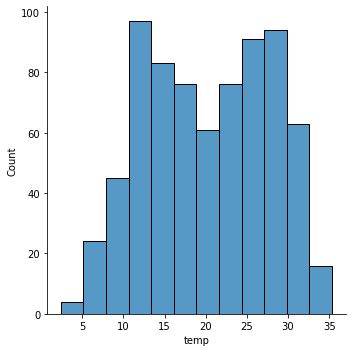

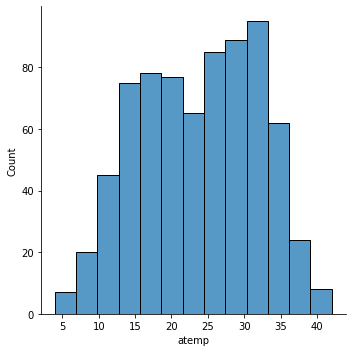

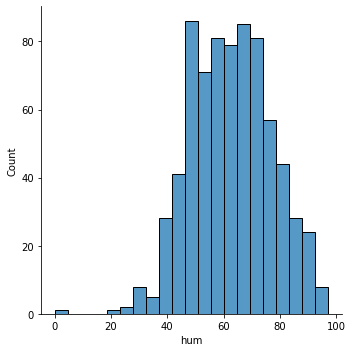

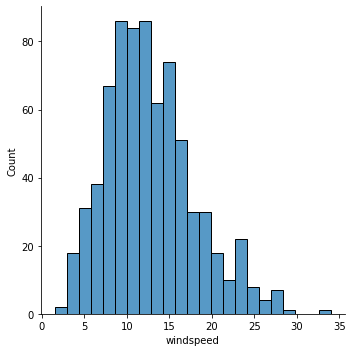

In [318]:
for i in bike_conti:
    sns.displot(bike_df[i])
    plt.show()

<Figure size 1080x720 with 0 Axes>

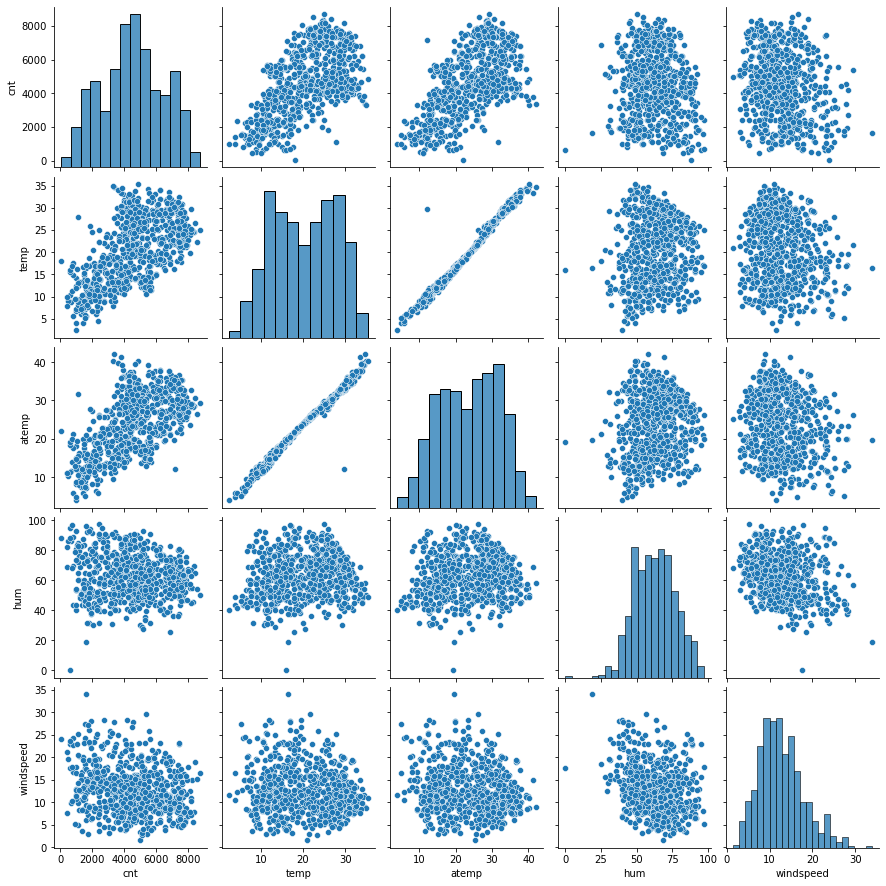

In [319]:
plt.figure(figsize =[15,10])
sns.pairplot(data = bike_df, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

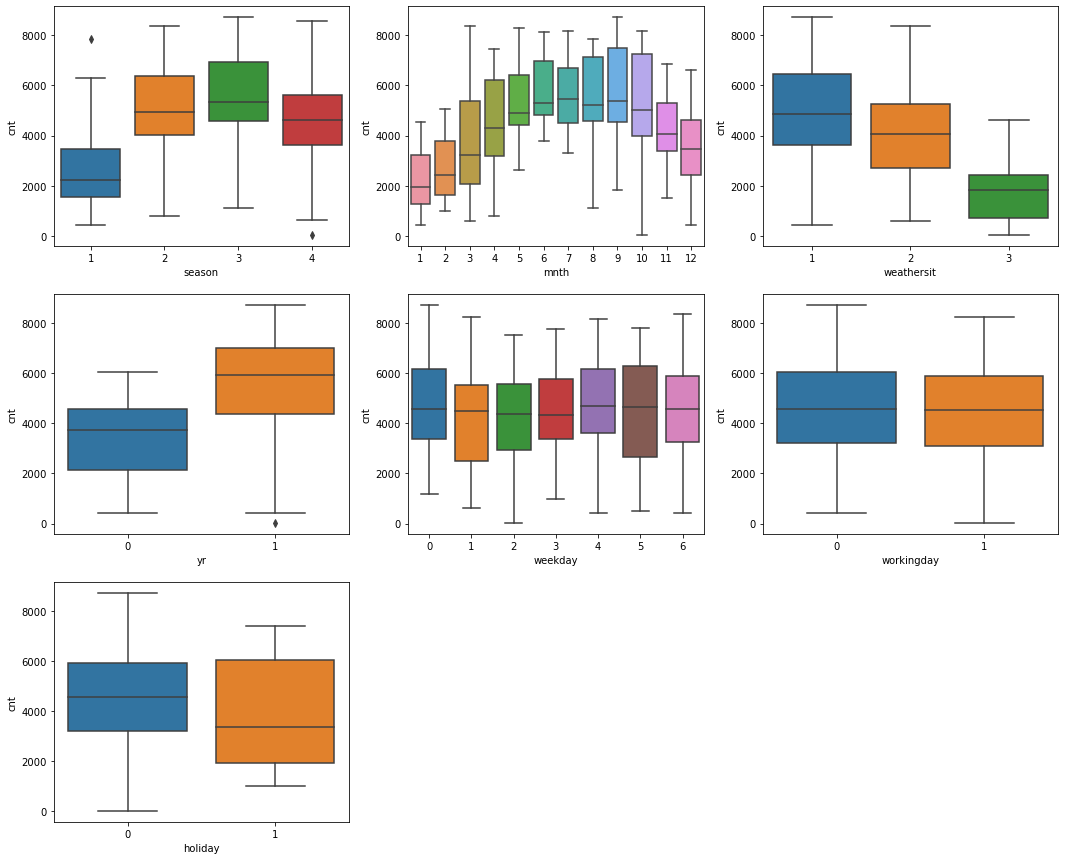

In [320]:
plt.figure(figsize =[18,15])
plt.subplot(3,3,1)
sns.boxplot(x ='season' , y = 'cnt' ,data =bike_df)
plt.subplot(3,3,2)
sns.boxplot(x ='mnth' , y = 'cnt' ,data =bike_df)
plt.subplot(3,3,3)
sns.boxplot(x ='weathersit' , y = 'cnt' ,data =bike_df)
plt.subplot(3,3,4)
sns.boxplot(x ='yr' , y = 'cnt' ,data =bike_df)
plt.subplot(3,3,5)
sns.boxplot(x ='weekday' , y = 'cnt' ,data =bike_df)
plt.subplot(3,3,6)
sns.boxplot(x ='workingday' , y = 'cnt' ,data =bike_df)
plt.subplot(3,3,7)
sns.boxplot(x ='holiday' , y = 'cnt' ,data =bike_df)

<AxesSubplot:>

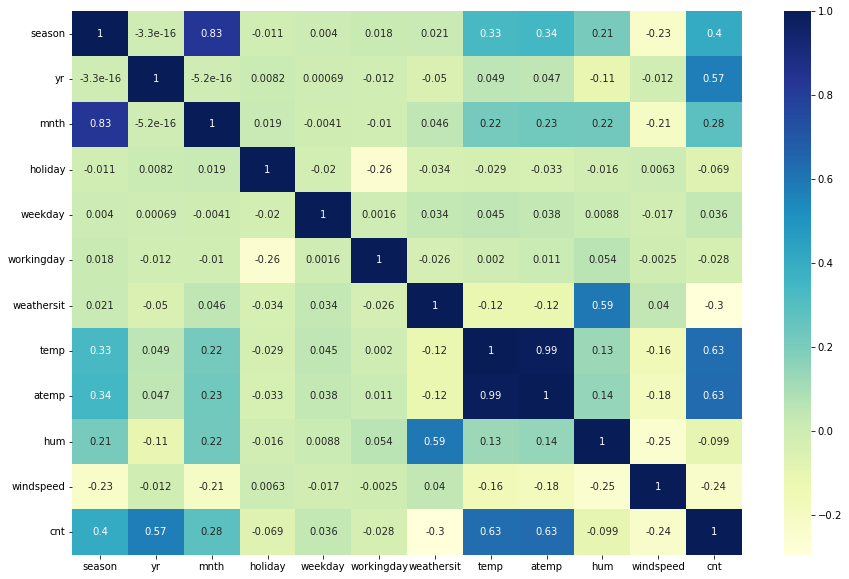

In [321]:
## HeatMap to check correlation
plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr(),annot=True, cmap = 'YlGnBu')

# <span style='color:blue'> Step 3:Data preprocessing</span>

### Dummy Variable Creation

In [322]:
bike_cata

['season', 'mnth', 'weathersit', 'weekday', 'workingday', 'yr', 'holiday']

In [323]:
bike_df[bike_cata].nunique()

season         4
mnth          12
weathersit     3
weekday        7
workingday     2
yr             2
holiday        2
dtype: int64

In [324]:
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_df.weathersit.replace({1:'Clear',2:'Mist & Cloudy', 3:'Light Snow & Rain',4:'Heavy Snow & Rain'},inplace = True)

bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [325]:
bike_df = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday","weathersit"],drop_first=True)

In [326]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [327]:
bike_df.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0


In [328]:
bike_df.shape

(730, 30)

#  <span style='color:blue'>Step 4: Splitting Data Into Training And Test Set</span>

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [330]:
df_train ,df_test =train_test_split(bike_df,train_size =0.7,random_state = 100)

In [331]:
df_train.shape ,df_test.shape

((510, 30), (220, 30))

In [332]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yr                            510 non-null    int64  
 1   holiday                       510 non-null    int64  
 2   workingday                    510 non-null    int64  
 3   temp                          510 non-null    float64
 4   atemp                         510 non-null    float64
 5   hum                           510 non-null    float64
 6   windspeed                     510 non-null    float64
 7   cnt                           510 non-null    int64  
 8   season_spring                 510 non-null    uint8  
 9   season_summer                 510 non-null    uint8  
 10  season_winter                 510 non-null    uint8  
 11  mnth_aug                      510 non-null    uint8  
 12  mnth_dec                      510 non-null    uint8  
 13  mnt

#  <span style='color:blue'>Step 5: Rescaling Features</span>

In [333]:
Scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = Scaler.fit_transform(df_train[num_vars])

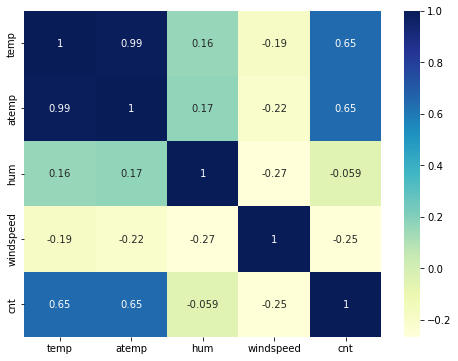

In [334]:
plt.figure(figsize =[8,6])
sns.heatmap(df_train[num_vars].corr(),annot =True ,cmap ='YlGnBu')
plt.show()

In [335]:
#Creating X_train ,y_train
y_train =df_train.pop('cnt')
X_train =df_train

# <span style='color:blue'>Step 6: Building Linear Model</span>

In [336]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [337]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe =RFE(lm,15)
rfe =rfe.fit(X_train ,y_train)

In [338]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 12),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 9),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 7),
 ('weekday_wed', False, 11),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1)]

In [339]:
#selected variables from RFE
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [340]:
#variables not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

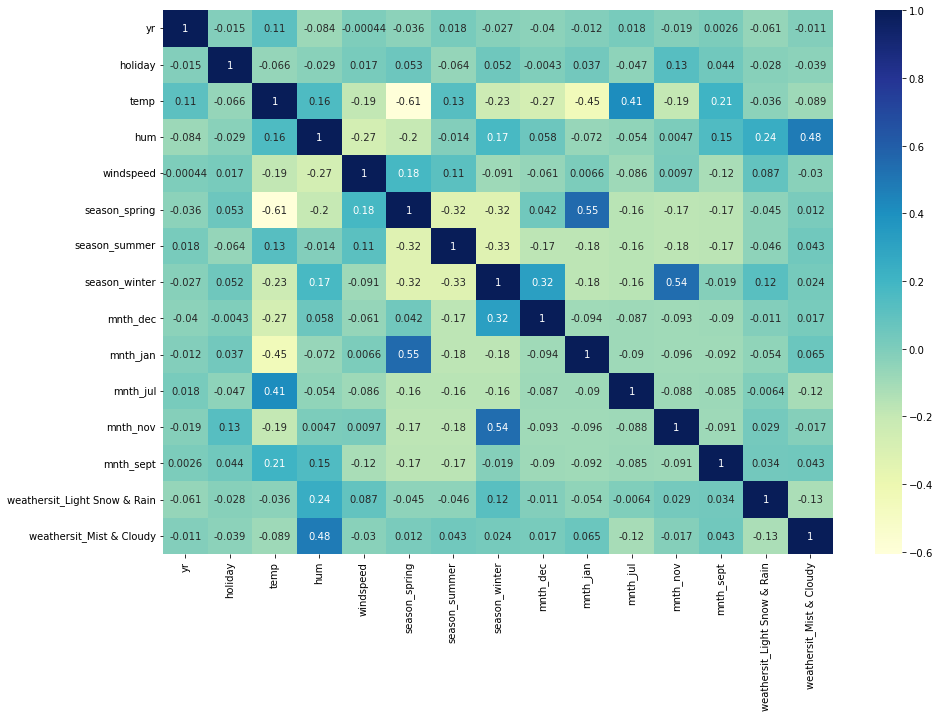

In [341]:
plt.figure(figsize =[15,10])
sns.heatmap(X_train[col].corr(),annot =True ,cmap ='YlGnBu')
plt.show()

# Model 1

In [342]:
X_train_rfe = X_train[col]

In [343]:
import statsmodels.api as sm
X_train_rfe =sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          8.15e-189
Time:                        21:27:19   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3197      0.036      8.859      0.000       0.249       0.391
yr                               0.2304      0.008     28.487      0.000       0.215       0.246
holiday                         -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp                             0.4815      0.037     13.005      0.000       0.409       0.554
hum                             -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                       -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_spring                   -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_summer                    0.0423      0.015      2.761      0.006       0.012       0.072
season_winter                    0.1019      0.018      5.656      0.000       0.067       0.137
mnth_dec                        -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_jan                        -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_jul                        -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_nov                        -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_sept                        0.0755      0.017      4.466      0.000       0.042       0.109
weathersit_Light Snow & Rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weathersit_Mist & Cloudy        -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [344]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [345]:
vif =pd.DataFrame()
x =X_train_rfe
vif["Features"] =x.columns
vif['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ="VIF" ,ascending =False)
vif

,Features,VIF
0,const,82.52
6,season_spring,5.27
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.77
4,hum,1.92
12,mnth_nov,1.77
10,mnth_jan,1.68
15,weathersit_Mist & Cloudy,1.57
9,mnth_dec,1.50


In [346]:
X_train_new = X_train_rfe.drop(["mnth_jan"],axis =1)

# Model 2

In [347]:
X_train_rfe =sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.0
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          9.86e-189
Time:                        21:27:19   Log-Likelihood:                 511.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     495   BIC:                            -929.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.3002      0.035      8.499      0.000       0.231       0.370
yr                               0.2294      0.008     28.268      0.000       0.213       0.245
holiday                         -0.0923      0.026     -3.588      0.000      -0.143      -0.042
temp                             0.5103      0.035     14.509      0.000       0.441       0.579
hum                             -0.1699      0.038     -4.489      0.000      -0.244      -0.096
windspeed                       -0.1816      0.026     -7.053      0.000      -0.232      -0.131
season_spring                   -0.0649      0.021     -3.049      0.002      -0.107      -0.023
season_summer                    0.0476      0.015      3.125      0.002       0.018       0.078
season_winter                    0.1072      0.018      5.963      0.000       0.072       0.142
mnth_dec                        -0.0248      0.017     -1.456      0.146      -0.058       0.009
mnth_jul                        -0.0574      0.018     -3.137      0.002      -0.093      -0.021
mnth_nov                        -0.0329      0.019     -1.755      0.080      -0.070       0.004
mnth_sept                        0.0777      0.017      4.583      0.000       0.044       0.111
weathersit_Light Snow & Rain    -0.2418      0.026     -9.134      0.000      -0.294      -0.190
weathersit_Mist & Cloudy        -0.0539      0.011     -5.132      0.000      -0.075      -0.033
==============================================================================
Omnibus:                       63.130   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.275
Skew:                          -0.650   Prob(JB):                     1.42e-33
Kurtosis:                       5.330   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [348]:
vif =pd.DataFrame()
x =X_train_rfe
vif["Features"] =x.columns
vif['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ="VIF" ,ascending =False)
vif

,Features,VIF
0,const,78.31
6,season_spring,5.24
3,temp,3.95
8,season_winter,3.77
7,season_summer,2.71
4,hum,1.91
11,mnth_nov,1.74
14,weathersit_Mist & Cloudy,1.56
10,mnth_jul,1.48
9,mnth_dec,1.40


In [349]:
X_train_new = X_train_rfe.drop(["mnth_dec"],axis =1)

# Model 3

In [350]:
X_train_rfe =sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.0
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          1.94e-189
Time:                        21:27:20   Log-Likelihood:                 510.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     496   BIC:                            -933.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2910      0.035      8.364      0.000       0.223       0.359
yr                               0.2294      0.008     28.233      0.000       0.213       0.245
holiday                         -0.0928      0.026     -3.603      0.000      -0.143      -0.042
temp                             0.5237      0.034     15.400      0.000       0.457       0.590
hum                             -0.1742      0.038     -4.613      0.000      -0.248      -0.100
windspeed                       -0.1806      0.026     -7.007      0.000      -0.231      -0.130
season_spring                   -0.0605      0.021     -2.868      0.004      -0.102      -0.019
season_summer                    0.0510      0.015      3.378      0.001       0.021       0.081
season_winter                    0.1028      0.018      5.794      0.000       0.068       0.138
mnth_jul                        -0.0576      0.018     -3.142      0.002      -0.094      -0.022
mnth_nov                        -0.0226      0.017     -1.298      0.195      -0.057       0.012
mnth_sept                        0.0808      0.017      4.803      0.000       0.048       0.114
weathersit_Light Snow & Rain    -0.2380      0.026     -9.025      0.000      -0.290      -0.186
weathersit_Mist & Cloudy        -0.0528      0.010     -5.037      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       59.274   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.651
Skew:                          -0.624   Prob(JB):                     2.12e-30
Kurtosis:                       5.207   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [351]:
vif =pd.DataFrame()
x =X_train_rfe
vif["Features"] =x.columns
vif['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ="VIF" ,ascending =False)
vif

,Features,VIF
0,const,75.84
6,season_spring,5.14
3,temp,3.69
8,season_winter,3.66
7,season_summer,2.65
4,hum,1.90
13,weathersit_Mist & Cloudy,1.56
10,mnth_nov,1.49
9,mnth_jul,1.48
11,mnth_sept,1.31


In [352]:
X_train_new = X_train_rfe.drop(["mnth_nov"],axis =1)

# Model 4

In [353]:
X_train_rfe =sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          2.95e-190
Time:                        21:27:20   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2848      0.034      8.258      0.000       0.217       0.353
yr                               0.2294      0.008     28.208      0.000       0.213       0.245
holiday                         -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                             0.5299      0.034     15.728      0.000       0.464       0.596
hum                             -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed                       -0.1822      0.026     -7.074      0.000      -0.233      -0.132
season_spring                   -0.0564      0.021     -2.700      0.007      -0.097      -0.015
season_summer                    0.0531      0.015      3.536      0.000       0.024       0.083
season_winter                    0.0976      0.017      5.643      0.000       0.064       0.132
mnth_jul                        -0.0572      0.018     -3.123      0.002      -0.093      -0.021
mnth_sept                        0.0833      0.017      4.973      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
weathersit_Mist & Cloudy        -0.0527      0.010     -5.017      0.000      -0.073      -0.032
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [354]:
vif =pd.DataFrame()
x =X_train_rfe
vif["Features"] =x.columns
vif['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ="VIF" ,ascending =False)
vif

,Features,VIF
0,const,74.37
6,season_spring,5.02
3,temp,3.61
8,season_winter,3.48
7,season_summer,2.62
4,hum,1.89
12,weathersit_Mist & Cloudy,1.56
9,mnth_jul,1.48
10,mnth_sept,1.30
11,weathersit_Light Snow & Rain,1.24


In [355]:
X_train_new = X_train_rfe.drop(["hum"],axis =1)

# Model 5

In [356]:
X_train_rfe =sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          5.06e-187
Time:                        21:27:20   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1994      0.030      6.746      0.000       0.141       0.258
yr                               0.2336      0.008     28.352      0.000       0.217       0.250
holiday                         -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                             0.4910      0.033     14.770      0.000       0.426       0.556
windspeed                       -0.1479      0.025     -5.887      0.000      -0.197      -0.099
season_spring                   -0.0672      0.021     -3.175      0.002      -0.109      -0.026
season_summer                    0.0465      0.015      3.051      0.002       0.017       0.076
season_winter                    0.0817      0.017      4.730      0.000       0.048       0.116
mnth_jul                        -0.0521      0.019     -2.790      0.005      -0.089      -0.015
mnth_sept                        0.0768      0.017      4.517      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
weathersit_Mist & Cloudy        -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [357]:
vif =pd.DataFrame()
x =X_train_rfe
vif["Features"] =x.columns
vif['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ="VIF" ,ascending =False)
vif

,Features,VIF
0,const,52.57
5,season_spring,4.95
3,temp,3.38
7,season_winter,3.34
6,season_summer,2.60
8,mnth_jul,1.48
9,mnth_sept,1.29
4,windspeed,1.09
10,weathersit_Light Snow & Rain,1.05
11,weathersit_Mist & Cloudy,1.04


In [358]:
X_train_new = X_train_rfe.drop(["mnth_jul"],axis =1)

# Model 6

In [359]:
X_train_rfe =sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sat, 06 Aug 2022   Prob (F-statistic):          1.47e-186
Time:                        21:27:20   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1909      0.030      6.447      0.000       0.133       0.249
yr                               0.2341      0.008     28.237      0.000       0.218       0.250
holiday                         -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp                             0.4777      0.033     14.423      0.000       0.413       0.543
windspeed                       -0.1481      0.025     -5.854      0.000      -0.198      -0.098
season_spring                   -0.0554      0.021     -2.654      0.008      -0.096      -0.014
season_summer                    0.0621      0.014      4.350      0.000       0.034       0.090
season_winter                    0.0945      0.017      5.630      0.000       0.062       0.127
mnth_sept                        0.0910      0.016      5.566      0.000       0.059       0.123
weathersit_Light Snow & Rain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
weathersit_Mist & Cloudy        -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [360]:
vif =pd.DataFrame()
x =X_train_rfe
vif["Features"] =x.columns
vif['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ="VIF" ,ascending =False)
vif

,Features,VIF
0,const,52.00
5,season_spring,4.76
3,temp,3.31
7,season_winter,3.11
6,season_summer,2.25
8,mnth_sept,1.17
4,windspeed,1.09
9,weathersit_Light Snow & Rain,1.05
10,weathersit_Mist & Cloudy,1.04
1,yr,1.02


In [361]:
X_train_new = X_train_rfe.drop(["const"],axis =1)

In [362]:
vif =pd.DataFrame()
x =X_train_new
vif["Features"] =x.columns
vif['VIF'] =[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ="VIF" ,ascending =False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
9,weathersit_Mist & Cloudy,1.55
7,mnth_sept,1.23
8,weathersit_Light Snow & Rain,1.08
1,holiday,1.04


# <span style='color:blue'>Step 7:Residual Analysis</span>

In [363]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 1.0, 'Error Terms')

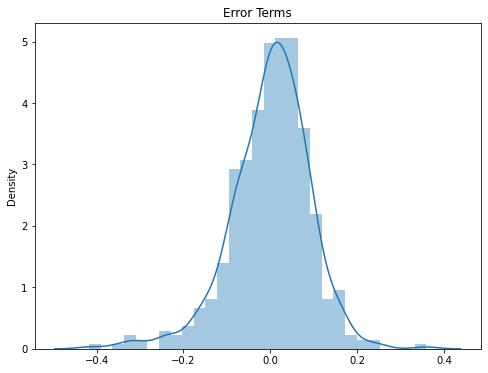

In [364]:
res = y_train - y_train_pred
plt.figure(figsize =[8,6])
sns.distplot(res)
plt.title("Error Terms")

# <span style='color:blue'>Step 8: Prediction And Evalution on Test Set</span>

In [365]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = Scaler.transform(df_test[num_vars])

In [366]:
#Dividing into X_test and y_test

y_test = df_test.pop('cnt')
X_test = df_test

In [367]:
#Dropping all those variables that we have dropped in training set 
X_test_new =X_test[X_train_new.columns]

In [368]:
#Adding Constant
X_test_new = sm.add_constant(X_test_new)

In [369]:
y_test_pred = lm.predict(X_test_new)

In [370]:
#evaluate model 
from sklearn.metrics import r2_score
r_test = r2_score(y_true = y_test,y_pred =y_test_pred )
r_train =r2_score(y_true = y_train,y_pred =y_train_pred )

#printing R-Squared 

print("R-Squared on Train Set : ",r_train)
print("R-Squared on Test Set : ",r_test)

R-Squared on Train Set :  0.8327073211549113
R-Squared on Test Set :  0.8038195990728842


#### conclusion:
We can see that the r_squared on the test set is 0.803 and the r-squared on the trained set 0.832 which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

Text(0, 0.5, 'y_test_pred')

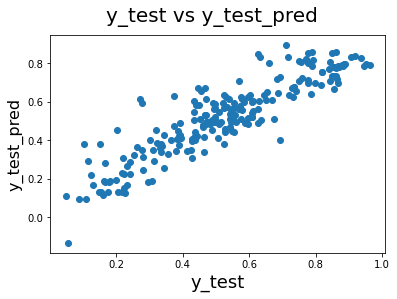

In [371]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

### Conclusion:
We can conclude that the final model fit isn't by chance, and has descent predictive power.

### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [372]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,11))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.477737
1,yr,0.234132
0,const,0.190855
7,season_winter,0.094476
8,mnth_sept,0.090998
6,season_summer,0.062076
5,season_spring,-0.055406
10,weathersit_Mist & Cloudy,-0.078741
2,holiday,-0.096316


### <span style='color:red'>Final Conclusions :</span>
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

<i><span style='color:blue'>cnt =0.190 + 0.477 X temp + 0.234 X yr + 0.094 X season_winter + 0.090 X mnth_sept +0.062 X season_summer - 0.055 X season_spring - 0.078 X weathersit_Mist & Cloudy - 0.096 X holiday - 0.148 X windspeed -0.285 X weathersit_Light Snow & Rain</span></i>

### All the positive coefficients like temp,season_Summer,season_winter , mnth_sept indicate that an increase in          these values will lead to an increase in the value of cnt.

### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 80% of bike demand.
Coefficient of the variables explains the factors effecting the bike demand

Based on final model top three features contributing significantly towards explaining the demand are:

Temperature (0.477737)
weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.363772)
year (0.234132)
Hence, it can be clearly concluded that the variables temperature , season/ weather situation and month are significant in predicting the demand for shared bikes .

# <span style='color:red'>Final Recommendations for the Company:</span>

1)The months - Sep should be considered by the company as they have a higher demand as compared to other months.

2) With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.

3) During the Winter season the demand rises, hence it should be well prepared to meet the high demand